In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 
# Winsorization
# 

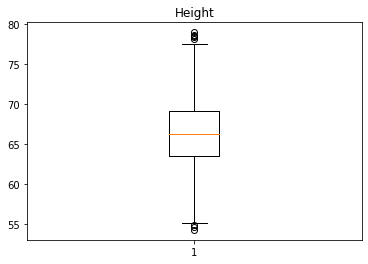

In [160]:
df = pd.read_csv('weight-height.csv' , sep=',') # importing the csv file into a dataframe

df=df.sort_values('Height', ascending=True) # Sorting data in an ascending order

def plot(column):
    plt.boxplot(column)
    plt.title('Height')
    plt.show()

plot(df.Height)


### Removing

In [161]:
low = np.quantile(df.Height,[0.02]) # Lower limit   (returns an array)                            
print(low) 
x =low[0] # getting the lower limit from the array
df1 = df.drop(df[df.Height < x].index) # Remove data below the value and assign its value 
                                            # to a new dataframe to keep the original
df1

[58.95993804]


,Gender,Height,Weight
8048,Female,58.960040,95.752318
8004,Female,58.963526,110.815421
6246,Female,58.964069,91.785550
7610,Female,58.972124,112.975630
6014,Female,58.980574,105.971760
...,...,...,...
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783


[73.98591719]


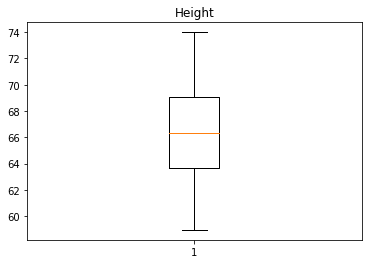

In [177]:
High = np.quantile(df.Height,[0.98]) # Using the original Dataframe to extract the Higher limit (returns an array)
print(High) 
y = High[0]
df1 = df1.drop(df1[df1.Height > y].index)# Apply the condition on the new dataframe
plot(df1.Height)  # We can notice the outliers disappeared after plotting the new data


### Clamping

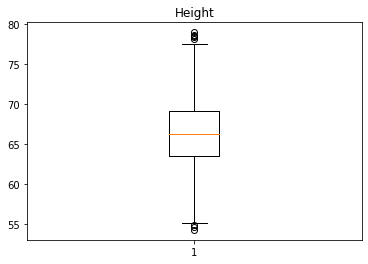

In [163]:
df2=pd.DataFrame() # New dataframe


df2['Height']=df['Height'] # append a column from the original data frame 
plot(df2.Height)




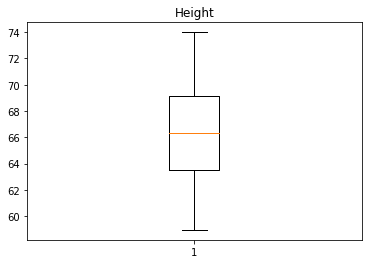

In [175]:
df2.loc[df['Height']> y, 'Height'] = y #All values in df2.Height that are higher than the upper limit will be equal to 
                                       # Upper limit
df2.loc[df['Height']< x, 'Height'] = x #All values in df2.Height that are Lower than the lower limit will be equal to 
                                       # Lower limit

plot(df2.Height) # Same Results on the plotbox
plt.show()